In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from isaac.visualization import plot_lineplot_with_paper_style

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
directory = "cell_type_choice_plots/"

# Mass training plots

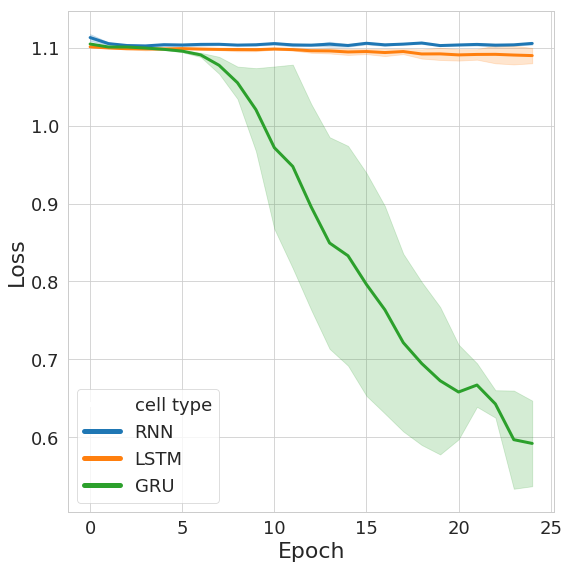

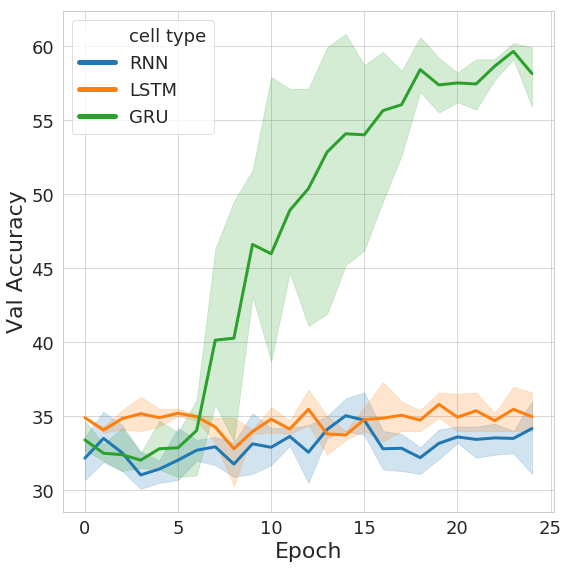

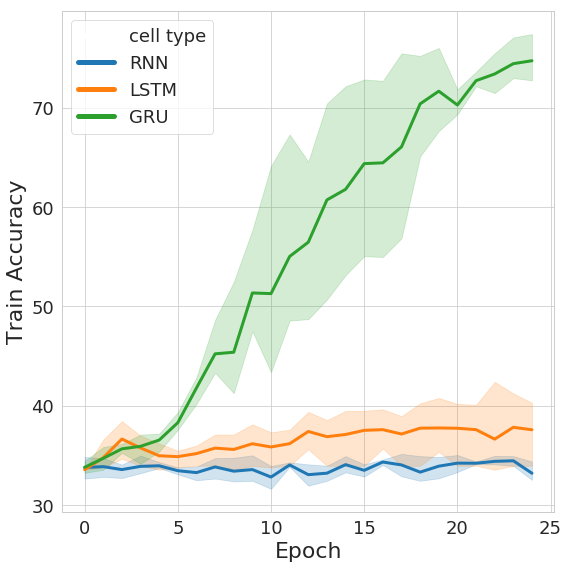

In [4]:
question_type = "mass"

stats = pd.read_hdf(directory+question_type+"_stats.h5")
stats = stats.rename({"cell_type": "cell type"}, axis="columns")

ax = plot_lineplot_with_paper_style(directory+question_type+"_losses.pdf", 
                                    x="Epoch", y="Loss", hue="cell type",
                                    markers=True, data=stats, hue_order=["RNN", "LSTM", "GRU"], ci="sd")

plt.show()

ax = plot_lineplot_with_paper_style(directory+question_type+"_all_val_acc_plot.pdf", 
                                    x="Epoch", y="Val Accuracy", hue="cell type", 
                                    data=stats, hue_order=["RNN", "LSTM", "GRU"])
plt.show()
ax = plot_lineplot_with_paper_style(directory+question_type+"_all_train_acc_plot.pdf", 
                                    x="Epoch", y="Train Accuracy", hue="cell type", 
                                    data=stats, hue_order=["RNN", "LSTM", "GRU"])

# Force training plots

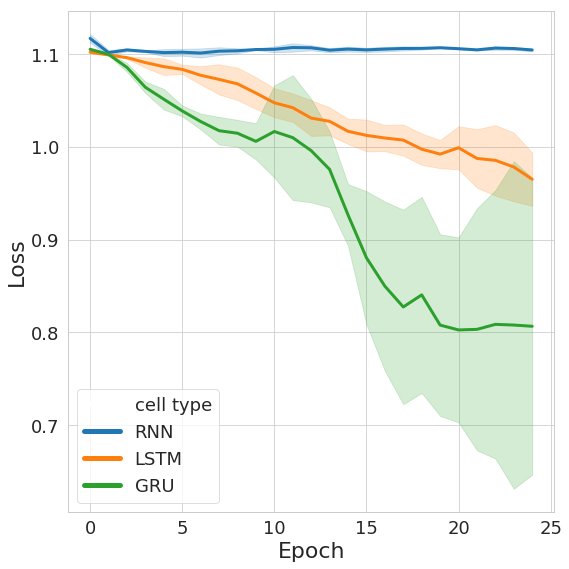

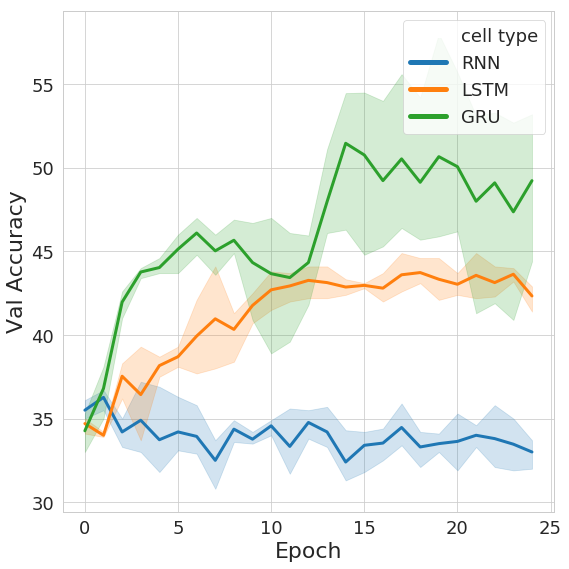

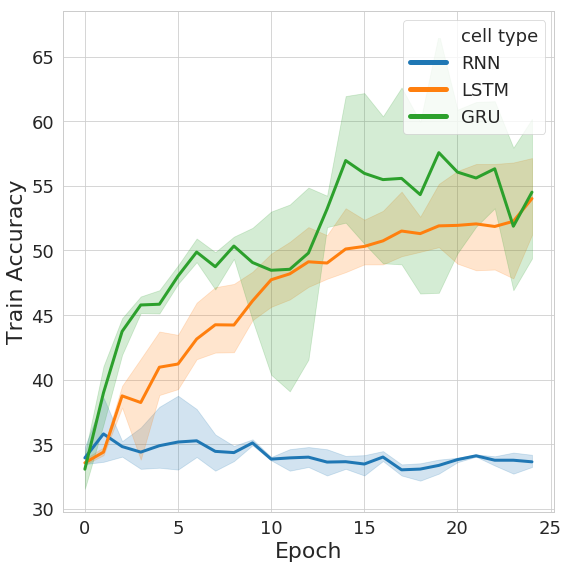

In [5]:
question_type = "force"

stats = pd.read_hdf(directory+question_type+"_stats.h5")
stats = stats.rename({"cell_type": "cell type"}, axis="columns")

ax = plot_lineplot_with_paper_style(directory+question_type+"_losses.pdf", 
                                    x="Epoch", y="Loss", hue="cell type",
                                    markers=True, data=stats, hue_order=["RNN", "LSTM", "GRU"], ci="sd")

plt.show()

ax = plot_lineplot_with_paper_style(directory+question_type+"_all_val_acc_plot.pdf", 
                                    x="Epoch", y="Val Accuracy", hue="cell type", 
                                    data=stats, hue_order=["RNN", "LSTM", "GRU"])
plt.show()
ax = plot_lineplot_with_paper_style(directory+question_type+"_all_train_acc_plot.pdf", 
                                    x="Epoch", y="Train Accuracy", hue="cell type", 
                                    data=stats, hue_order=["RNN", "LSTM", "GRU"])